# Machine Learning

**Textbook is available @ [https://www.github.com/a-mhamdi/mlpy](https://www.github.com/a-mhamdi/mlpy)**

---

## Logistic Regression

Logistic regression is a statistical method used for classification tasks. It is used to predict the probability that an instance belongs to a particular class. Logistic regression is named for the function used at the core of the method, the logistic function.

In logistic regression, the goal is to find the best fitting model that represents the relationship between the independent variables and the dependent variable. The dependent variable is binary, meaning it can take on only two values (such as `yes` or `no`), and the independent variables can be continuous or categorical.

The logistic function is used to model the probability that an instance belongs to a particular class. The logistic function takes the form:

$$y \;=\; p(z) \;=\; \sigma(z) \;=\; \dfrac{1}{1 + \mathrm{e}^{-z}}$$

where $p$ is the probability that the instance belongs to the positive class, and $z$ is the linear combination of the independent variables and the model coefficients. The linear combination is calculated as:

$$z \;=\; \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_{m-1} x_{m-1} \;=\; x^T\theta$$

where $x_1$, $x_2$, ..., $x_{m-1}$ are the independent variables, and $\theta_0$, $\theta_1$, $\theta_2$, ..., $\theta_{m-1}$ are the coefficients that represent the influence of each variable on the dependent variable. The coefficients are estimated using the data, and the resulting equation is used to make predictions on new data.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
plt.style.use('dark_background')
plt.rc('figure', figsize=(6, 4))

from matplotlib import rcParams
rcParams['font.family'] = 'Comfortaa'
rcParams['font.size'] = 8
rcParams['axes.unicode_minus'] = False

### Importing the dataset

In [3]:
df = pd.read_csv('./datasets/Social_Network_Ads.csv')

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
X = df.iloc[:, :-1].values; X[:, -1] = X[:, -1] / 1000
y = df.iloc[:, -1].values

### Splitting the dataset into training and test sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123, stratify=y)

In [10]:
np.sum(y == 1) / len(y)

0.3575

In [11]:
np.sum(y_train == 1) / len(y_train)

0.35833333333333334

In [12]:
np.sum(y_test == 1) / len(y_test)

0.35625

### Training the Logistic Regression model on the Training set

In [13]:
from sklearn.linear_model import LogisticRegression

The following code will create a logistic regression model that fits a curve to the training data. We will need it later in order to make predictions on the test data.

In [14]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [15]:
clf.coef_, clf.intercept_

(array([[0.24936096, 0.02904117]]), array([-12.55074814]))

### Predicting a new result

In [16]:
sample = np.array([[30, 87]])

In [17]:
z = np.sum(clf.coef_ * sample) + clf.intercept_
o = 1/(1+np.exp(-z))
o

array([0.07287533])

In [18]:
clf.predict_proba(sample)

array([[0.92712467, 0.07287533]])

In [19]:
clf.predict(sample)

array([0])

### Predicting the test set results

In [20]:
y_prob = clf.predict_proba(X_test)
y_prob[:5]

array([[0.29785453, 0.70214547],
       [0.99632567, 0.00367433],
       [0.98321777, 0.01678223],
       [0.34676606, 0.65323394],
       [0.93532456, 0.06467544]])

The predicted class will be the class with the higher probability, as determined by the logistic function.

In [21]:
np.argmax(y_prob, axis=1)

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

In [22]:
y_pred = clf.predict(X_test)

### Making the Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[94,  9],
       [13, 44]])

In [25]:
accuracy_score(y_test, y_pred)

0.8625

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

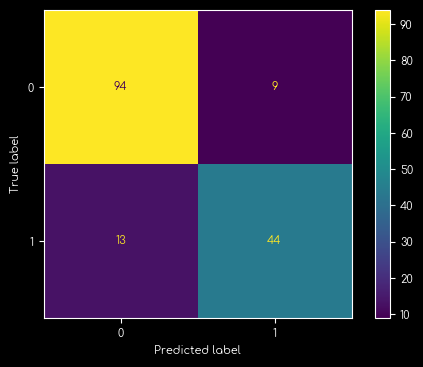

In [27]:
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot();

Another fancy way to display the confusion matrix is to call the builtin method `crosstab` form `pandas` library as shown below.

In [28]:
pd.crosstab(y_test, y_pred, rownames=['Expected'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Expected,,,
0,94,9,103
1,13,44,57
All,107,53,160


In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       103
           1       0.83      0.77      0.80        57

    accuracy                           0.86       160
   macro avg       0.85      0.84      0.85       160
weighted avg       0.86      0.86      0.86       160



Logistic regression handles both continuous and categorical independent variables, and outputs probabilities for each class, which can be useful for tasks such as fraud detection or medical diagnosis. However, it's important to note that the independent variables must be linearly related to the log odds of the dependent variable in order for logistic regression to be appropriate. If the relationship is non-linear, we may need to use a different type of classification algorithm.